In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [4]:
fpath = "C:/Users/Yameen/Desktop/Sehrish/RomanCoinsDataset/images/"
random_seed = 42

categories = os.listdir(fpath)
categories = categories[:100]
print("List of Categories = ",categories,"\n\nNo. of Categories = ", len(categories))



List of Categories =  ['1', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99'] 

No. of Categories =  100


In [5]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  17546 
No. of labels loaded =  17546
<class 'list'> <class 'list'>


In [6]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (17546, 227, 227, 3) 
Labels shape =  (17546,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


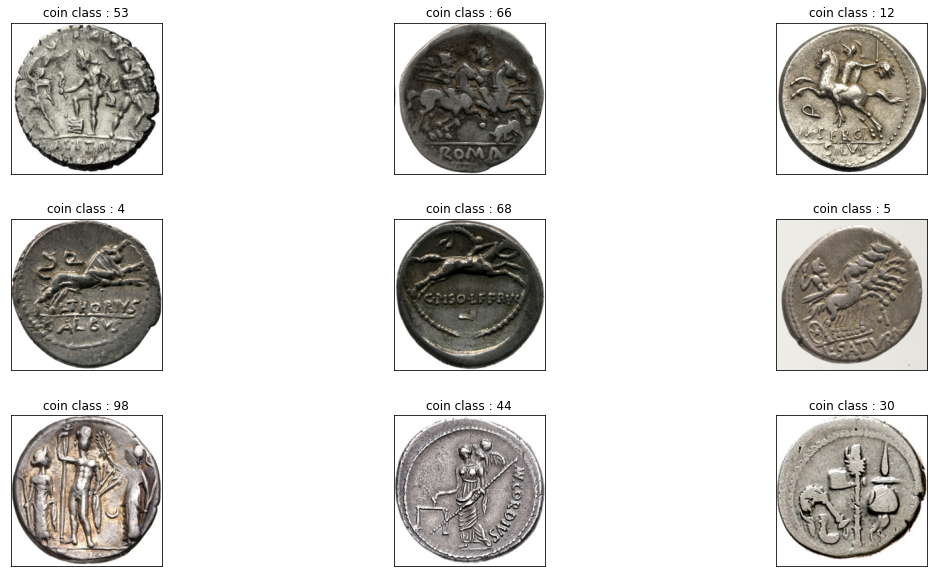

In [7]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('coin class : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [11]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [    0     1     2 ... 17543 17544 17545]

'n' values after shuffling =  [  101  9056 13553 ...  5390   860 15795]


In [12]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (17546, 227, 227, 3) 
Labels shape after shuffling =  (17546,)


In [13]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

MemoryError: Unable to allocate 10.1 GiB for an array with shape (17546, 227, 227, 3) and data type float32

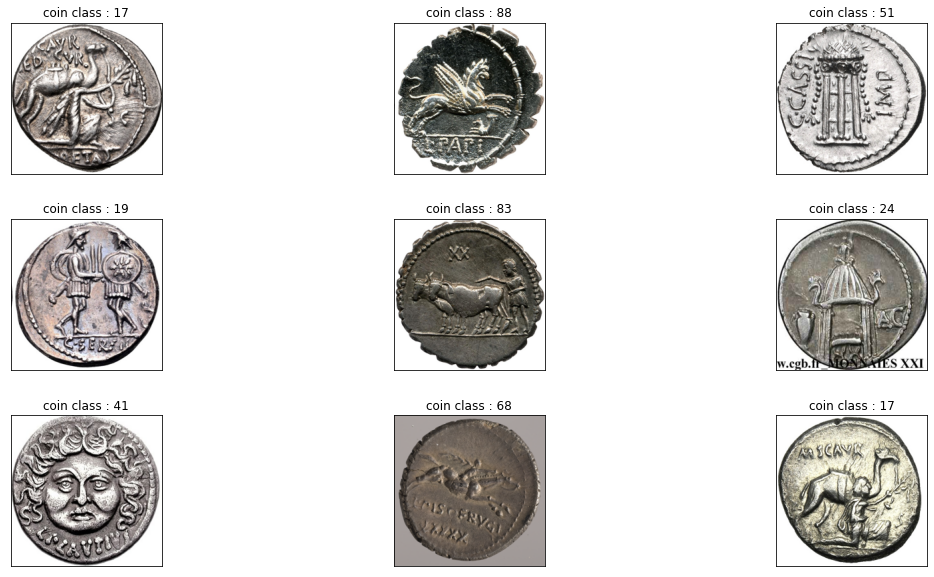

In [14]:
display_rand_images(images, labels)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (15791, 227, 227, 3)
y_train shape =  (15791,)

x_test shape =  (1755, 227, 227, 3)
y_test shape =  (1755,)


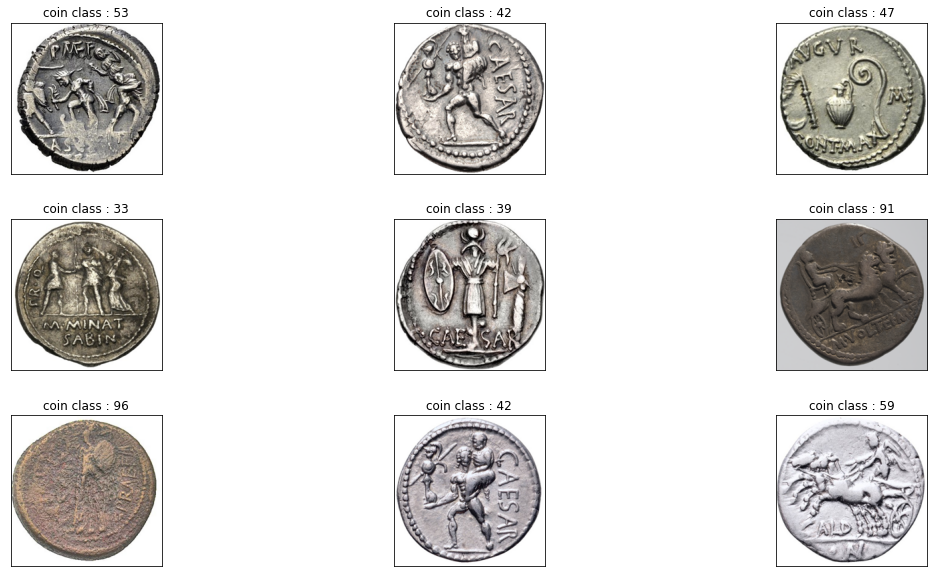

In [16]:
display_rand_images(x_train, y_train)

In [17]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))
/
model.add(BatchNormalization())

#output layer/
model.add(Dense(101,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 384)         8

In [18]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [19]:
%%time
history = model.fit(x_train, y_train, epochs=160)

Epoch 1/160
494/494 [==============================] - 233s 472ms/step - loss: 4.2820 - accuracy: 0.0913
Epoch 2/160
494/494 [==============================] - 236s 477ms/step - loss: 2.3162 - accuracy: 0.4072
Epoch 3/160
494/494 [==============================] - 233s 471ms/step - loss: 1.1449 - accuracy: 0.6934
Epoch 4/160
494/494 [==============================] - 228s 462ms/step - loss: 0.6659 - accuracy: 0.8228
Epoch 5/160
494/494 [==============================] - 229s 464ms/step - loss: 0.4548 - accuracy: 0.8752
Epoch 6/160
494/494 [==============================] - 226s 457ms/step - loss: 0.3655 - accuracy: 0.8996
Epoch 7/160
494/494 [==============================] - 226s 458ms/step - loss: 0.2972 - accuracy: 0.9189
Epoch 8/160
494/494 [==============================] - 228s 461ms/step - loss: 0.2545 - accuracy: 0.9290
Epoch 9/160
494/494 [==============================] - 227s 460ms/step - loss: 0.2584 - accuracy: 0.9251
Epoch 10/160
494/494 [==============================] -

494/494 [==============================] - 224s 454ms/step - loss: 0.0167 - accuracy: 0.9904
Epoch 155/160
494/494 [==============================] - 224s 454ms/step - loss: 0.0182 - accuracy: 0.9904
Epoch 156/160
494/494 [==============================] - 225s 455ms/step - loss: 0.0167 - accuracy: 0.9911
Epoch 157/160
494/494 [==============================] - 224s 454ms/step - loss: 0.0193 - accuracy: 0.9900
Epoch 158/160
494/494 [==============================] - 225s 455ms/step - loss: 0.0240 - accuracy: 0.9894
Epoch 159/160
494/494 [==============================] - 225s 455ms/step - loss: 0.0262 - accuracy: 0.9883
Epoch 160/160
494/494 [==============================] - 224s 453ms/step - loss: 0.0203 - accuracy: 0.9911
Wall time: 10h 40s


In [20]:
# evaluate the model
train_acc = model.evaluate(x_test, y_test, verbose=0)
/

()

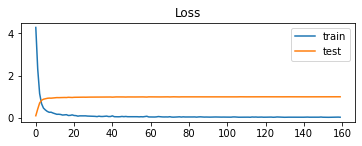

In [21]:
import matplotlib.pyplot as plt 
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['accuracy'], label='test')
plt.legend()


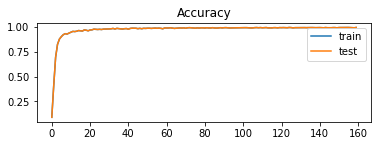

In [22]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['accuracy'], label='test')
plt.legend()
plt.show()

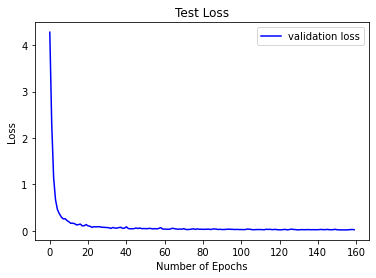

In [23]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [24]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

55/55 [==============================] - 5s 90ms/step - loss: 0.3635 - accuracy: 0.9658
0.36352917551994324 0.9658119678497314


In [25]:
pred = model.predict(x_test)

pred.shape

(1755, 101)

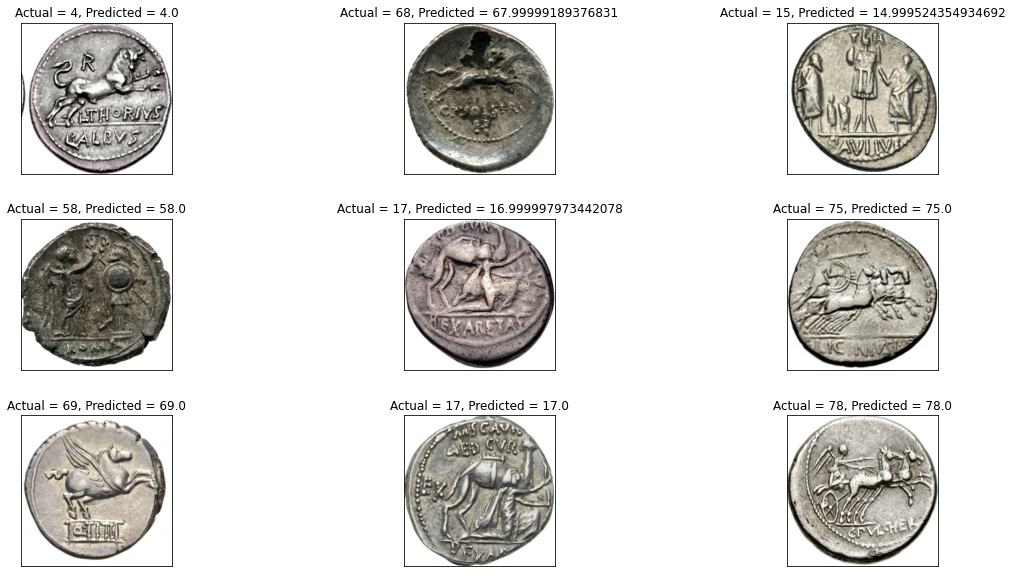

In [26]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

In [27]:
model.save("C:/Users/Yameen/Desktop/Sehrish/AlexNet03.h5")


In [28]:
from keras.models import load_model
loaded_model=load_model("AlexNet03.h5")
loss,accuracy=loaded_model.evaluate(x_test, y_test)

55/55 [==============================] - 5s 96ms/step - loss: 0.3635 - accuracy: 0.0057
